GeoViews is a [Python](http://python.org) library that makes it easy to explore and visualize geographical, meteorological, and oceanographic datasets, such as those used in weather, climate, and remote sensing research.  

GeoViews is built on the [HoloViews](http://holoviews.org) library for building flexible visualizations of multidimensional data.  GeoViews adds a family of geographic plot types based on the [Cartopy](http://scitools.org.uk/cartopy) library, plotted using either the [Matplotlib](http://matplotlib.org) or [Bokeh](http://bokeh.pydata.org) packages. 
With GeoViews, you can now work easily and naturally with large, multidimensional geographic datasets, instantly visualizing any subset or combination of them, while always being able to access the raw data underlying any plot.  Here's a simple example:

In [1]:
import geoviews as gv
import geoviews.feature as gf
import xarray as xr
from cartopy import crs
from datetime import datetime
from bokeh.models.tiles import WMTSTileSource
import math

gv.extension('bokeh', 'matplotlib')

ModuleNotFoundError: No module named 'geoviews'

In [2]:
(gf.ocean + gf.land + gf.ocean * gf.land * gf.coastline * gf.borders).opts(
    'Feature', projection=crs.Geostationary(), global_extent=True, height=325).cols(3)

:Layout
   .Ocean.I   :Feature   [Longitude,Latitude]
   .Land.I    :Feature   [Longitude,Latitude]
   .Overlay.I :Overlay
      .Ocean.I     :Feature   [Longitude,Latitude]
      .Land.I      :Feature   [Longitude,Latitude]
      .Coastline.I :Feature   [Longitude,Latitude]
      .Borders.I   :Feature   [Longitude,Latitude]

GeoViews is designed to work well with the [Iris](http://scitools.org.uk/iris) and [xarray](http://xarray.pydata.org)  libraries for working with multidimensional arrays, such as those stored in netCDF files.  GeoViews also accepts data as NumPy arrays and Pandas data frames.  In each case, the data can be left stored in its original, native format, wrapped in a HoloViews or GeoViews object that provides instant interactive visualizations.

The following example loads a dataset originally taken from [iris-sample-data](https://github.com/SciTools/iris-sample-data) and quickly builds an interactive tool for exploring how the data changes over time:

:HoloMap   [time]
   :Overlay
      .Image.I     :Image   [longitude,latitude]   (surface_temperature)
      .Coastline.I :Feature   [Longitude,Latitude]
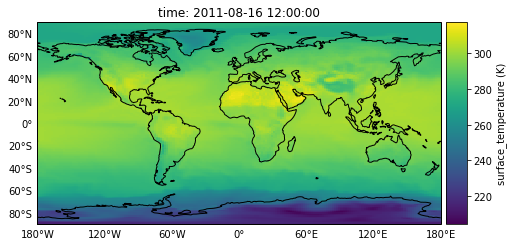
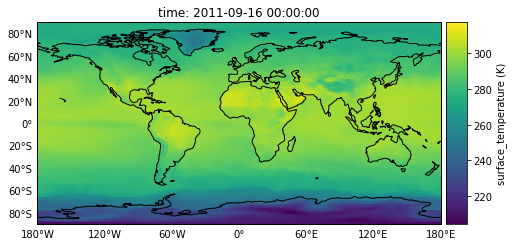
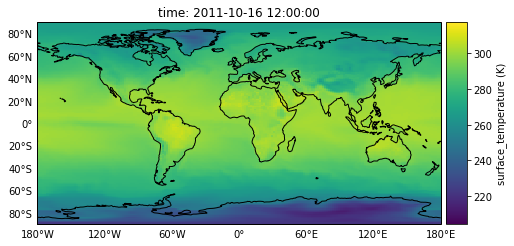
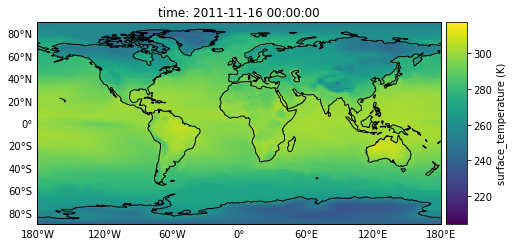
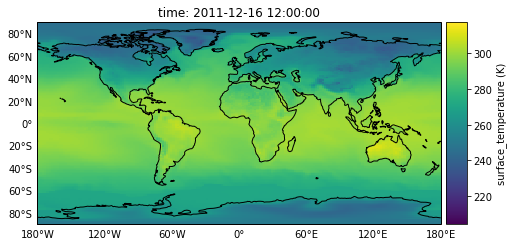
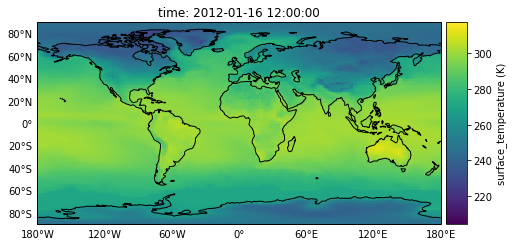

In [4]:
dataset = gv.Dataset(xr.open_dataset('./data/ensemble.nc'))
ensemble = dataset.to(gv.Image, ['longitude', 'latitude'], 'surface_temperature')

gv.output(ensemble.opts(cmap='viridis', colorbar=True, fig_size=200, backend='matplotlib') * gf.coastline(),
          backend='matplotlib')

GeoViews also natively supports geopandas datastructures allowing us to easily plot shapefiles and choropleths:

In [6]:
import geopandas as gpd
gv.Polygons(gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')), vdims=['pop_est', ('name', 'Country')]).opts(
    tools=['hover'], width=600, projection=crs.Robinson()
)

AttributeError: 'LinearRing' object has no attribute 'dtype'

:Polygons   [Longitude,Latitude]   (pop_est,name)

In [ ]:
def sliceDimensions(state, padding=0, roundedOut=False):
    """Returns the appropriate latitude and longitude slices
    """

    # The column names are "","STATEFP","STUSPS","NAME","xmin","ymin","xmax","ymax"

    boundingBoxes = {
        ("1","01","AL","Alabama"): (-88.473227,30.223334,-84.88908,35.008028),
        ("2","02","AK","Alaska"): (-179.148909,51.214183,179.77847,71.365162),
        ("3","60","AS","American Samoa"): (-171.089874,-14.548699,-168.1433,-11.046934),
        ("4","04","AZ","Arizona"): (-114.81651,31.332177,-109.045223,37.00426),
        ("5","05","AR","Arkansas"): (-94.617919,33.004106,-89.644395,36.4996),
        ("6","06","CA","California"): (-124.409591,32.534156,-114.131211,42.009518),
        ("7","08","CO","Colorado"): (-109.060253,36.992426,-102.041524,41.003444),
        ("8","69","MP","Commonwealth of the Northern Mariana Islands"): (144.886331,14.110472,146.064818,20.553802),
        ("9","09","CT","Connecticut"): (-73.727775,40.980144,-71.786994,42.050587),
        ("10","10","DE","Delaware"): (-75.788658,38.451013,-75.048939,39.839007),
        ("11","11","DC","District of Columbia"): (-77.119759,38.791645,-76.909395,38.99511),
        ("12","12","FL","Florida"): (-87.634938,24.523096,-80.031362,31.000888),
        ("13","13","GA","Georgia"): (-85.605165,30.357851,-80.839729,35.000659),
        ("14","66","GU","Guam"): (144.618068,13.234189,144.956712,13.654383),
        ("15","15","HI","Hawaii"): (-178.334698,18.910361,-154.806773,28.402123),
        ("16","16","ID","Idaho"): (-117.243027,41.988057,-111.043564,49.001146),
        ("17","17","IL","Illinois"): (-91.513079,36.970298,-87.494756,42.508481),
        ("18","18","IN","Indiana"): (-88.09776,37.771742,-84.784579,41.760592),
        ("19","19","IA","Iowa"): (-96.639704,40.375501,-90.140061,43.501196),
        ("20","20","KS","Kansas"): (-102.051744,36.993016,-94.588413,40.003162),
        ("21","21","KY","Kentucky"): (-89.571509,36.497129,-81.964971,39.147458),
        ("22","22","LA","Louisiana"): (-94.043147,28.928609,-88.817017,33.019457),
        ("23","23","ME","Maine"): (-71.083924,42.977764,-66.949895,47.459686),
        ("24","24","MD","Maryland"): (-79.487651,37.911717,-75.048939,39.723043),
        ("25","25","MA","Massachusetts"): (-73.508142,41.237964,-69.928393,42.886589),
        ("26","26","MI","Michigan"): (-90.418136,41.696118,-82.413474,48.2388),
        ("27","27","MN","Minnesota"): (-97.239209,43.499356,-89.491739,49.384358),
        ("28","28","MS","Mississippi"): (-91.655009,30.173943,-88.097888,34.996052),
        ("29","29","MO","Missouri"): (-95.774704,35.995683,-89.098843,40.61364),
        ("30","30","MT","Montana"): (-116.050003,44.358221,-104.039138,49.00139),
        ("31","31","NE","Nebraska"): (-104.053514,39.999998,-95.30829,43.001708),
        ("32","32","NV","Nevada"): (-120.005746,35.001857,-114.039648,42.002207),
        ("33","33","NH","New Hampshire"): (-72.557247,42.69699,-70.610621,45.305476),
        ("34","34","NJ","New Jersey"): (-75.559614,38.928519,-73.893979,41.357423),
        ("35","35","NM","New Mexico"): (-109.050173,31.332301,-103.001964,37.000232),
        ("36","36","NY","New York"): (-79.762152,40.496103,-71.856214,45.01585),
        ("37","37","NC","North Carolina"): (-84.321869,33.842316,-75.460621,36.588117),
        ("38","38","ND","North Dakota"): (-104.0489,45.935054,-96.554507,49.000574),
        ("39","39","OH","Ohio"): (-84.820159,38.403202,-80.518693,41.977523),
        ("40","40","OK","Oklahoma"): (-103.002565,33.615833,-94.430662,37.002206),
        ("41","41","OR","Oregon"): (-124.566244,41.991794,-116.463504,46.292035),
        ("42","42","PA","Pennsylvania"): (-80.519891,39.7198,-74.689516,42.26986),
        ("43","72","PR","Puerto Rico"): (-67.945404,17.88328,-65.220703,18.515683),
        ("44","44","RI","Rhode Island"): (-71.862772,41.146339,-71.12057,42.018798),
        ("45","45","SC","South Carolina"): (-83.35391,32.0346,-78.54203,35.215402),
        ("46","46","SD","South Dakota"): (-104.057698,42.479635,-96.436589,45.94545),
        ("47","47","TN","Tennessee"): (-90.310298,34.982972,-81.6469,36.678118),
        ("48","48","TX","Texas"): (-106.645646,25.837377,-93.508292,36.500704),
        ("49","78","VI","United States Virgin Islands"): (-65.085452,17.673976,-64.564907,18.412655),
        ("50","49","UT","Utah"): (-114.052962,36.997968,-109.041058,42.001567),
        ("51","50","VT","Vermont"): (-73.43774,42.726853,-71.464555,45.016659),
        ("52","51","VA","Virginia"): (-83.675395,36.540738,-75.242266,39.466012),
        ("53","53","WA","Washington"): (-124.763068,45.543541,-116.915989,49.002494),
        ("54","54","WV","West Virginia"): (-82.644739,37.201483,-77.719519,40.638801),
        ("55","55","WI","Wisconsin"): (-92.888114,42.491983,-86.805415,47.080621),
        ("56","56","WY","Wyoming"): (-111.056888,40.994746,-104.05216,45.005904)
    }
    bounds = (0.0, 0.0, 0.0, 0.0)
    for (item in boundingBoxes.items()):
        if (state in item[0]):
            bounds = (item[1][0], item[1][1], item[1][2], item[1][3])
            break
    northeastBounds = (bounds[0] < 0.0 ? bounds[0] + 360.0 : bounds[0],
                       bounds[1],
                       bounds[2] < 0.0 ? bounds[2] + 360.0 : bounds[2],
                       bounds[3])
    paddedBounds = roundedOut ? (math.floor(northeastBounds[0] - padding),
                                 math.floor(northeastBounds[1] - padding),
                                 math.ceil(northeastBounds[2] + padding),
                                 math.ceil(northeastBounds[3] + padding))
                              : (northeastBounds[0] - padding,
                                 northeastBounds[1] - padding,
                                 northeastBounds[2] + padding,
                                 northeastBounds[3] + padding)
    return { lat: slice(paddedBounds[1], paddedBounds[3]), lon: slice(paddedBounds[0], paddedBounds[2]) }


:HoloMap   [time]
   :Overlay
      .Image.I     :Image   [lon,lat]   (TS)
      .WMTS.I      :WMTS   [Longitude,Latitude]
      .Coastline.I :Feature   [Longitude,Latitude]
      .Borders.I   :Feature   [Longitude,Latitude]
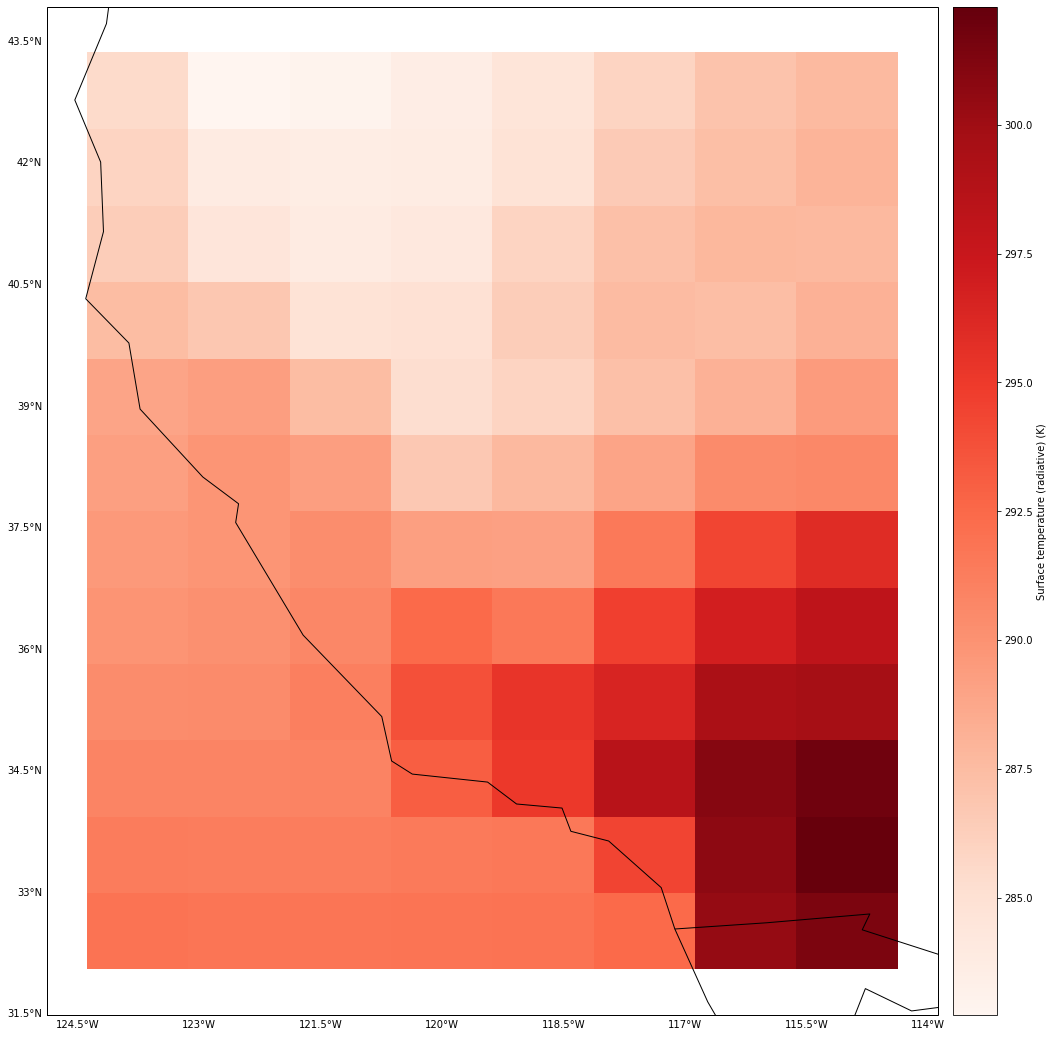

In [59]:
#opening nc file
preDataSet = xr.open_dataset('../data/Interns2019/f09_g16.B.cobalt.FRAM.MAY.TS.200005-208106.nc')

#slicing file dimensions
preDataSet = preDataSet.isel(time=slice(0,1))

# California
tile = 'http://c.tile.openstreetmap.org/{Z}/{X}/{Y}.png'
base_map = gv.WMTS(WMTSTileSource(url='http://c.tile.openstreetmap.org/{Z}/{X}/{Y}.png'))
# preDataSet = preDataSet.sel(lat=slice(30,55), lon=slice(230,250))

latSlice = None
lonSlice = None
preDataSet = preDataSet.sel(lat=slice(32,43), lon=slice(-124.409591 + 360 ,-114.131211 + 360))
# preDataSet = preDataSet.sel(lat=slice(32,43), lon=slice(358,2))


#creating dataset
dataset = gv.Dataset(preDataSet)
cobalt = dataset.to(gv.Image, ['lon', 'lat'], 'TS')

#creating visualization w/ time slider
gv.output(cobalt.opts(cmap='Reds', colorbar=True, fig_size=500, backend='matplotlib') * base_map *gf.coastline() * gf.borders(), max_frames=1000, 
          backend='matplotlib')

:Polygons   [Longitude,Latitude]   (pop_est,name)